말의 성비는 암  > 거 > 수 순이며 <br>
1등과 2등을 한 말들의 성비는 암 > 수 > 거 순이다.

In [2]:
#print(horse_sc) # 경기에 출전한 말의 성별
#print(horse_scv) # 경기에 출전한 말의 성별비
#print(horse_ratio) # 말의 분포
#print(first_ratio) # 1등한 말 분포
#print(second_ratio) # 2등한 말 분포
#print(total_ratio) # 1등 2등 합산한 말 분포

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('source/raw_vol2.0.csv')

In [5]:
df.iloc[:1,:10]

,MEET,RC_DATE,RC_NO,RC_DIST,RANK,WEATHER,TR_CON,TR_WC,ORD,CHUL_NO
0,제주,20230701,1,800,제6등급,흐림,포화,18,1,9


In [6]:
# 1등과 2등 말 수
ord_1_sex_count = df[df['ORD'] == 1]['SEX'].value_counts()
ord_2_sex_count = df[df['ORD'] == 2]['SEX'].value_counts()
ord_3_sex_count = df[df['ORD'] == 3]['SEX'].value_counts()

# 출전한 말의 성별
horse_sc = df.groupby('SEX')['MEET'].count().sort_values(ascending=False)
horse_scv = horse_sc / horse_sc.sum() * 100
print(horse_sc)
horse_scv

SEX
암    21159
거    18555
수    15035
Name: MEET, dtype: int64


SEX
암    38.647281
거    33.891030
수    27.461689
Name: MEET, dtype: float64

In [7]:
# ord_1_sex_count와 ord_2_sex_count 합산
ord_1_2_sex_count = ord_1_sex_count.add(ord_2_sex_count, fill_value=0).astype(int).sort_values(ascending=False)
ord_1_2_3_sex_count = ord_1_2_sex_count.add(ord_3_sex_count, fill_value=0).astype(int).sort_values(ascending=False)
print('1,2등의 성분포')
print(ord_1_2_sex_count, '\n')
print('1,2,3등의 성분포')
print(ord_1_2_3_sex_count)

1,2등의 성분포
SEX
암    3734
수    3409
거    3290
Name: count, dtype: int64 

1,2,3등의 성분포
SEX
암    5737
거    5040
수    4863
Name: count, dtype: int64


In [8]:
print('1등의 성분포')
print(ord_1_sex_count / ord_1_sex_count.sum() * 100)

print('2등의 성분포')
print(ord_2_sex_count / ord_2_sex_count.sum() * 100)

print('3등의 성분포')
print(ord_3_sex_count / ord_3_sex_count.sum() * 100)

print('1,2등의 성분포')
print(ord_1_2_sex_count / ord_1_2_sex_count.sum() * 100)

print('1,2,3등의 성분포')
print(ord_1_2_3_sex_count / ord_1_2_3_sex_count.sum() * 100)

1등의 성분포
SEX
암    35.762224
수    33.346117
거    30.891659
Name: count, dtype: float64
2등의 성분포
SEX
암    35.818321
거    32.177079
수    32.004599
Name: count, dtype: float64
3등의 성분포
SEX
암    38.467448
거    33.608604
수    27.923949
Name: count, dtype: float64
1,2등의 성분포
SEX
암    35.790281
수    32.675165
거    31.534554
Name: count, dtype: float64
1,2,3등의 성분포
SEX
암    36.681586
거    32.225064
수    31.093350
Name: count, dtype: float64


In [9]:
first_ratio = ord_1_sex_count / ord_1_sex_count.sum() * 100
second_ratio = ord_2_sex_count / ord_2_sex_count.sum() * 100
total_ratio = ord_1_2_sex_count / ord_1_2_sex_count.sum() * 100

In [10]:
# HR_NAME 중복 제거 후 SEX별 말 수 계산
unique_horses = df.drop_duplicates(subset='HR_NAME')
unique_horse_counts_sex_no_duplicates = unique_horses['SEX'].value_counts().sort_values(ascending=False)

In [11]:
horse_ratio = unique_horse_counts_sex_no_duplicates / unique_horse_counts_sex_no_duplicates.sum() * 100

In [12]:
horse_ratio

SEX
암    44.844517
거    29.153028
수    26.002455
Name: count, dtype: float64

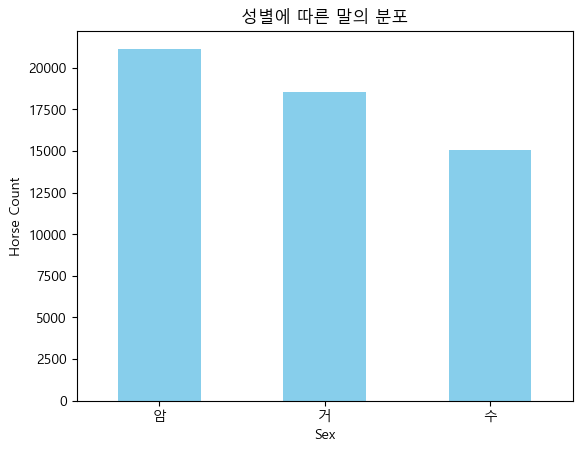

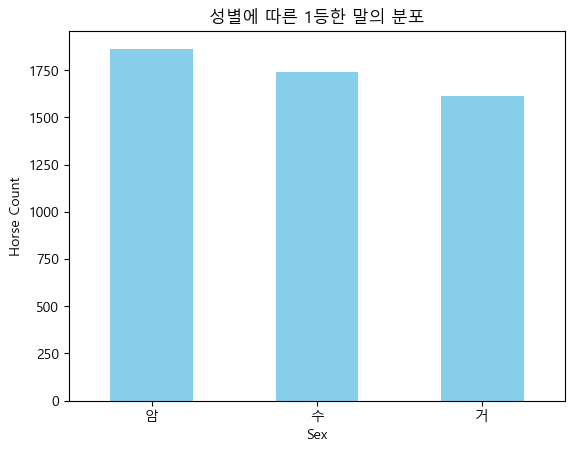

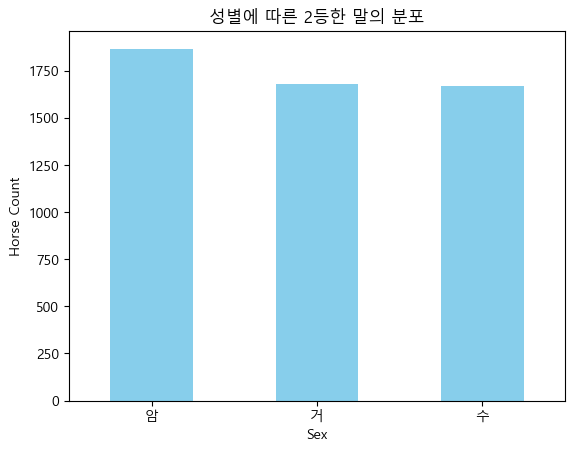

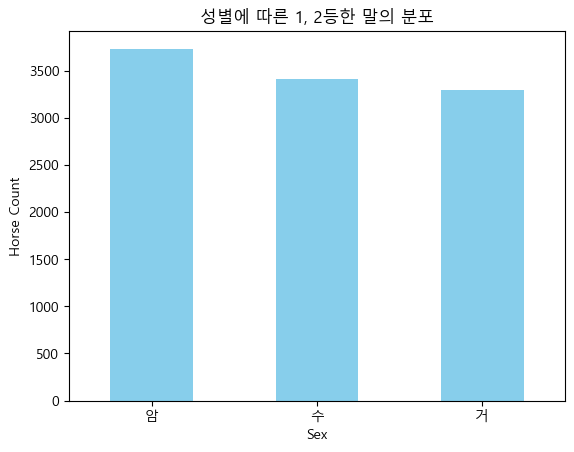

In [13]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우

horse_sc.plot(kind='bar', color='skyblue')
plt.title('성별에 따른 말의 분포')
plt.xlabel('Sex')
plt.ylabel('Horse Count')
plt.xticks(rotation=0)
plt.show()

ord_1_sex_count.plot(kind='bar', color='skyblue')
plt.title('성별에 따른 1등한 말의 분포')
plt.xlabel('Sex')
plt.ylabel('Horse Count')
plt.xticks(rotation=0)
plt.show()

ord_2_sex_count.plot(kind='bar', color='skyblue')
plt.title('성별에 따른 2등한 말의 분포')
plt.xlabel('Sex')
plt.ylabel('Horse Count')
plt.xticks(rotation=0)
plt.show()

ord_1_2_sex_count.plot(kind='bar', color='skyblue')
plt.title('성별에 따른 1, 2등한 말의 분포')
plt.xlabel('Sex')
plt.ylabel('Horse Count')
plt.xticks(rotation=0)
plt.show()

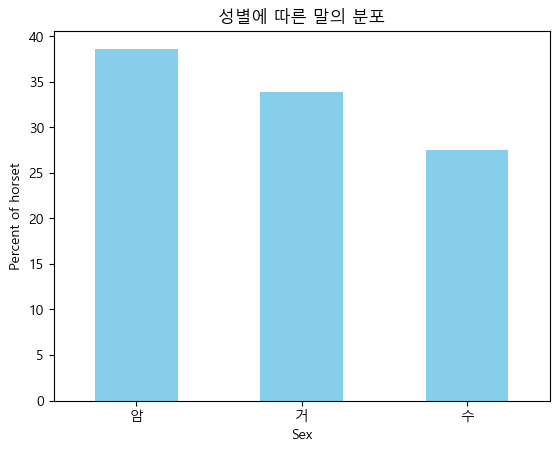

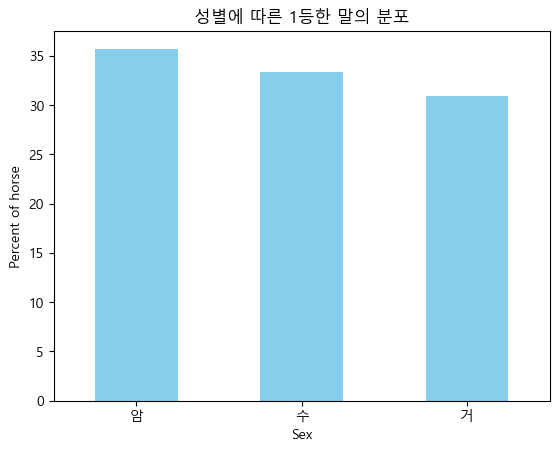

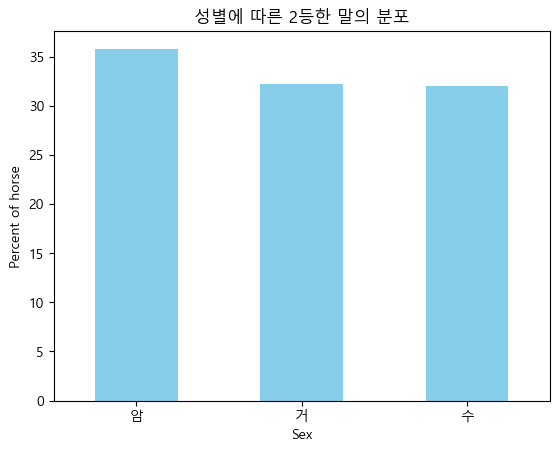

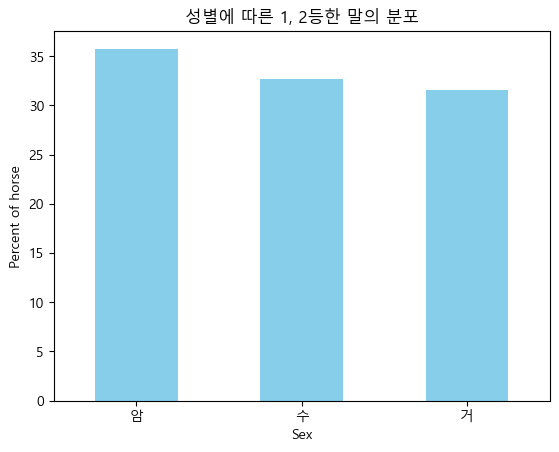

In [14]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우

horse_scv.plot(kind='bar', color='skyblue')
plt.title('성별에 따른 말의 분포')
plt.xlabel('Sex')
plt.ylabel('Percent of horset')
plt.xticks(rotation=0)
plt.show()

first_ratio.plot(kind='bar', color='skyblue')
plt.title('성별에 따른 1등한 말의 분포')
plt.xlabel('Sex')
plt.ylabel('Percent of horse')
plt.xticks(rotation=0)
plt.show()

second_ratio.plot(kind='bar', color='skyblue')
plt.title('성별에 따른 2등한 말의 분포')
plt.xlabel('Sex')
plt.ylabel('Percent of horse')
plt.xticks(rotation=0)
plt.show()

total_ratio.plot(kind='bar', color='skyblue')
plt.title('성별에 따른 1, 2등한 말의 분포')
plt.xlabel('Sex')
plt.ylabel('Percent of horse')
plt.xticks(rotation=0)
plt.show()